In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy
%matplotlib inline

In [2]:
from sympy.parsing.sympy_parser import parse_expr
from sympy.utilities import lambdify
from sympy import Symbol

In [3]:
ex = parse_expr("1/(1+exp(-x))")
dex = ex.diff('x')
d2ex = ex.diff('x', 2)
d3ex = ex.diff('x', 3)

In [5]:
print('ex:', ex)
print('dex:', dex)
print('d2ex:', d2ex)
print('d3ex:', d3ex)

ex: 1/(1 + exp(-x))
dex: exp(-x)/(1 + exp(-x))**2
d2ex: (-1 + 2*exp(-x)/(1 + exp(-x)))*exp(-x)/(1 + exp(-x))**2
d3ex: (1 - 6*exp(-x)/(1 + exp(-x)) + 6*exp(-2*x)/(1 + exp(-x))**2)*exp(-x)/(1 + exp(-x))**2


In [11]:
x = np.arange(-2*np.pi, 2*np.pi, 0.01)

In [12]:
ex_mas = lambdify(Symbol('x'), ex, 'numpy')(x)
dex_mas = lambdify(Symbol('x'), dex, 'numpy')(x)
d2ex_mas = lambdify(Symbol('x'), d2ex, 'numpy')(x)
d3ex_mas = lambdify(Symbol('x'), d3ex, 'numpy')(x)

In [13]:
def plot(input_list):
    for x, y, label in input_list:
        plt.figure()
        plt.plot(x, y, label=label);
        plt.legend()

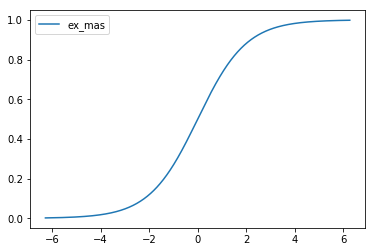

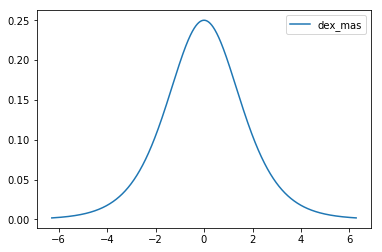

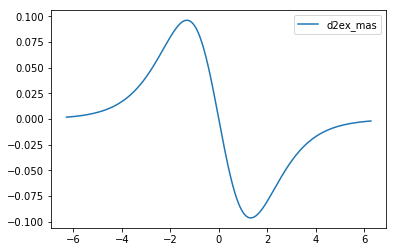

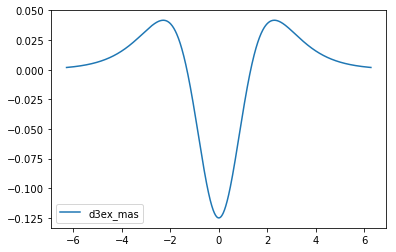

In [14]:
input_list = [[x, ex_mas, 'ex_mas'], 
              [x, dex_mas, 'dex_mas'], 
              [x, d2ex_mas, 'd2ex_mas'], 
              [x, d3ex_mas, 'd3ex_mas']]
plot(input_list)

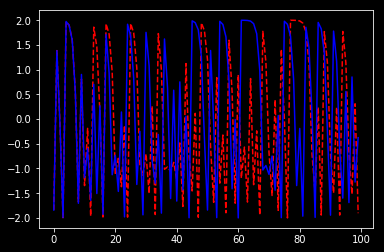

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

def get_seq(x, n=100):
    ans = []
    for i in range(n):
        x = x**2 - 2
        ans.append(x)
    return ans
x = 0.4
a = get_seq(0.4)
b = get_seq(0.4001)
plt.plot(a, color='red', linestyle='--');
plt.plot(b, color='blue');

In [2]:
for i in range(10):
    print(a[i], b[i])

-1.8399999999999999 -1.83991999
1.3855999999999993 1.3853055696016003
-0.08011264000000207 -0.08092847883078558
-1.9935819649122302 -1.993450581314135
1.9743690508233085 1.9738452201416625
1.898133148848932 1.8960649530760882
1.6029094507591615 1.5950623062834288
0.5693187073330366 0.544223760926211
-1.6758762094806403 -1.7038204980433302
0.8085610695031988 0.903004289552622


mean(a-b) -0.17160244982430778
mean(a-new_y) -0.04844300133033244


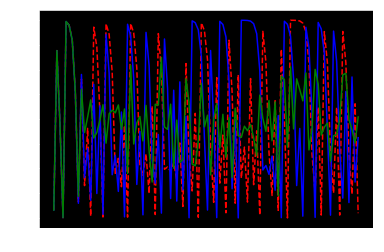

In [4]:
import numpy as np

h = 0.001
v = 0.4
new_seq = []
# make ensemble
for d in np.arange(v-2*h, v+2*h, h):
    y = get_seq(d)
    new_seq.append(y)

n = len(new_seq[0])
new_y = []
for i in range(n):
    yi = np.mean([e[i] for e in new_seq])
    new_y.append(yi)

plt.plot(a, color='red', linestyle='--');
plt.plot(b, color='blue');
plt.plot(new_y, color='green');
print('mean(a-b)', np.mean(np.array(a)-np.array(b)));
print('mean(a-new_y)', np.mean(np.array(a)-np.array(new_y)));